In [1]:
# Data Processing and Cleaning
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


In [2]:
train = pd.read_csv('tmdb-box-office-prediction/train.csv')
test = pd.read_csv('tmdb-box-office-prediction/test.csv')
submission = pd.read_csv('tmdb-box-office-prediction/sample_submission.csv')

In [3]:
train.head(3).T

,0,1,2
id,1,2,3
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN
budget,14000000,40000000,3300000
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]"
homepage,NaN,NaN,http://sonyclassics.com/whiplash/
imdb_id,tt2637294,tt0368933,tt2582802
original_language,en,en,en
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ..."
popularity,6.57539,8.24889,64.3


In [4]:
train.shape

(3000, 23)

In [5]:
test.shape

(4398, 22)

In [6]:
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

In [7]:
pd.DataFrame(train.isnull().sum()).T

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,0,2396,0,7,2054,0,0,0,8,0,...,0,2,20,0,597,0,276,13,16,0


In [8]:
((pd.DataFrame(train.isnull().sum()).T)/len(train))*100

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,0.0,79.866667,0.0,0.233333,68.466667,0.0,0.0,0.0,0.266667,0.0,...,0.0,0.066667,0.666667,0.0,19.9,0.0,9.2,0.433333,0.533333,0.0


In [9]:
((pd.DataFrame(test.isnull().sum()).T)/len(test))*100

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,0.0,80.059118,0.0,0.363802,67.712597,0.0,0.0,0.0,0.318327,0.0,...,2.319236,0.022738,0.09095,0.95498,0.045475,19.622556,0.068213,8.93588,0.295589,0.500227


In [10]:
pd.DataFrame(train.budget.value_counts()).T

,0,15000000,40000000,25000000,20000000,5000000,30000000,12000000,10000000,50000000,...,645180,125000,4361898,3600000,93,3750000,113,891000,5400000,24554
budget,812,72,71,71,68,68,65,54,53,50,...,1,1,1,1,1,1,1,1,1,1


In [11]:
train[train['revenue'] < 10][['imdb_id', 'title']].T

,334,347,639,695,1190,1346,1541,1754,1874,1917,2117,2251,2383,2490,2582
imdb_id,tt0376144,tt0118172,tt0183659,tt0374271,tt0089984,tt0048028,tt3805180,tt0110604,tt1133617,tt0016104,tt0294289,tt1729637,tt0065486,tt0113965,tt0339230
title,Saamy,The Wind in the Willows,Pollock,Tere Naam,He-Man and She-Ra: The Secret of the Sword,East of Eden,All at Once,Mute Witness,Missing,The Merry Widow,American Adobo,Bodyguard,Borsalino,Never Talk to Strangers,Kops


C:\Users\B-17\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


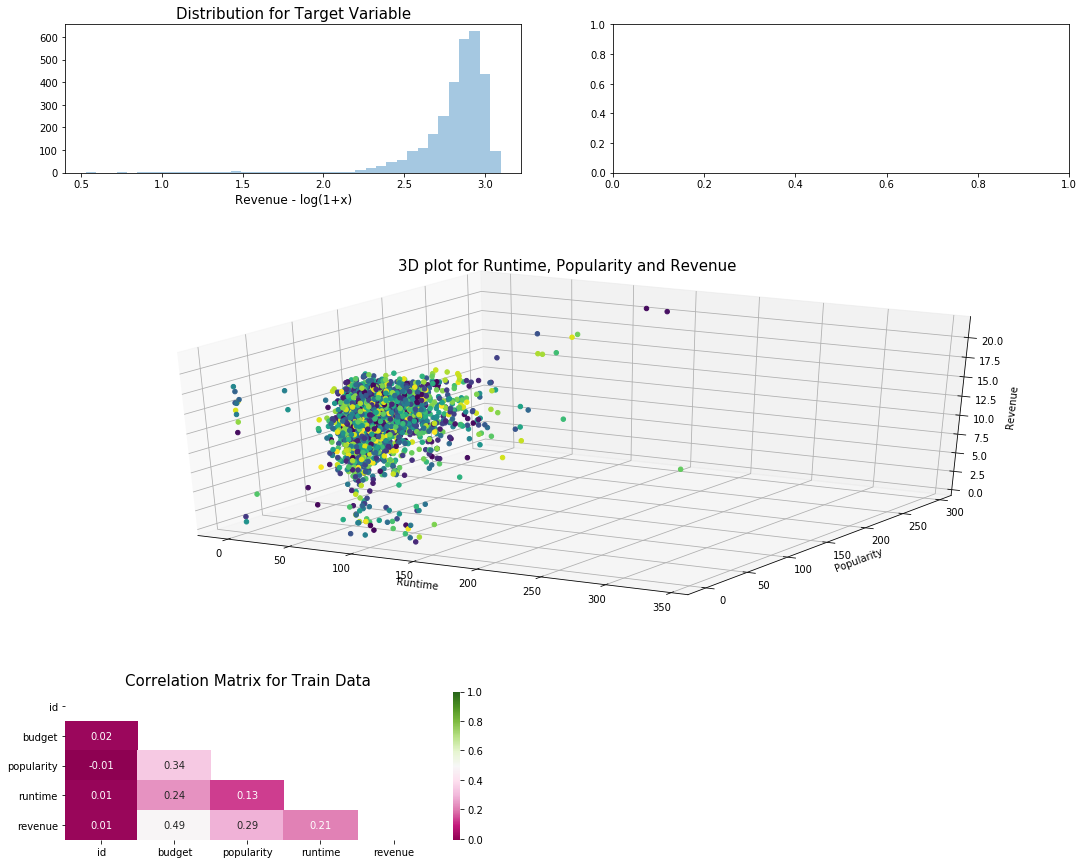

In [44]:
fig = plt.figure(figsize=(18,15))
plt.subplots_adjust(hspace=0.5)

# Plot 1: Target Variable Distribution
plt.subplot2grid((4,2), (0,0))

sns.distplot(np.log1p(train['revenue']), kde=False, bins=40)

plt.title('Distribution for Target Variable', fontsize = 15)
plt.xlabel('Revenue - log(1+x)', fontsize=12)

# Plot 2: Revenue and Budget
plt.subplot2grid((4,2), (0,1))

#sns.scatterplot(data=train, x='budget', y='revenue')
# sns.scatter(data=train,x='budget', y='revenue')
# plt.title('Revenue vs. Budget', fontsize = 15)
# plt.xlabel('Budget', fontsize=12)
# plt.ylabel('Revenue', fontsize=12)

# Plot 3: Revenue, Runtime, and Popularity
ax = plt.subplot2grid((4,2), (1,0), projection='3d', rowspan = 2, colspan = 2)
colors = np.random.rand(len(train))

x3d = np.array(train['runtime'])
y3d = np.array(train['popularity'])
z3d = np.array(train['revenue'])
ax.scatter(x3d, y3d, z3d, c = colors, alpha = 1)

ax.set_xlabel('Runtime')
ax.set_ylabel('Popularity')
ax.set_zlabel('Revenue')
ax.set_title('3D plot for Runtime, Popularity and Revenue', fontsize = 15)

# Plot 4: Correlation matrix
plt.subplot2grid((4,2), (3,0))

corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, cmap = 'PiYG', annot = True, fmt=".2f")

plt.yticks(rotation=0) 
plt.xticks(rotation=0)
plt.title('Correlation Matrix for Train Data', fontsize = 15)

# Display Plot
plt.show()

* Target Variable Distribution: It's never a bad idea to start by plotting the distribution of the target variable. Using np.log1p allows us to plot the several values between 0 and 1 million USD and get a much more uniform distribution.
* Revenue vs. Budget: A scatterplot to explore the relationship between these two numerical features. We have plenty of zero values for budget
* 3D Plot: A 3D plot to explore the relationship between Runtime, Popularity, and Revenue.
* Correlation Matrix: So revenue and budget are highly correlated. Let's try to predict the target variable with just with this one variable and get a baseline score and leaderboard rank!

In [13]:
train['revenue'] = np.log1p(train['revenue'])

In [14]:
x = train.budget.values.reshape(-1,1)
y = train.revenue
reg = LinearRegression().fit(x, y)

In [15]:
print(f'Regression Score: {reg.score(x, y)}')
print(f'Regression Coefficient: {reg.coef_[0]}')
print(f'Regression Intercept: {reg.intercept_}')

Regression Score: 0.23605620285222098
Regression Coefficient: 4.017051002648621e-08
Regression Intercept: 15.056890891994975


In [16]:
predictions = reg.predict(test['budget'].values.reshape(-1,1))

In [17]:
submission['revenue'] = np.round(np.expm1(predictions))

In [18]:
submission.to_csv('submission_budget_linreg.csv', index = False)

In [19]:
rf_cols = ['budget', 'original_language', 'popularity', 'release_date', 'runtime', 'status', 'revenue']
rf_train = train[rf_cols].copy()
rf_cols.remove('revenue')
rf_test = test[rf_cols].copy()

In [20]:
median_budget = rf_train[rf_train['budget'] > 0]['budget'].median()
median_budget

16000000.0

In [21]:
def fill_budget(df, median_budget):
    df['budget_is_median'] = 0
    df.loc[df.budget == 0, 'budget_is_median'] = 1
    df.loc[df.budget == 0, 'budget'] = median_budget
    return df

In [22]:
rf_train = fill_budget(rf_train, median_budget)
rf_test = fill_budget(rf_test, median_budget)

In [23]:
rf_combined = pd.concat([rf_train, rf_test], sort=False)

In [24]:
le = LabelEncoder()
le.fit(rf_combined['original_language'])
rf_train['original_language'] = le.transform(rf_train['original_language'])
rf_test['original_language'] = le.transform(rf_test['original_language'])

In [25]:
rf_test.loc[rf_test['status'].isnull() == True, 'status'] = 'Released'
rf_combined.loc[rf_combined['status'].isnull() == True, 'status'] = 'Released'

In [26]:
le = LabelEncoder()
le.fit(rf_combined['status'])
rf_train['status'] = le.transform(rf_train['status'])
rf_test['status'] = le.transform(rf_test['status'])


In [27]:
median_runtime = rf_train['runtime'].median()
median_runtime

104.0

In [28]:
def fill_runtime(df, median_runtime):
    df['runtime_is_median'] = 0
    df.loc[df.runtime == 0, 'runtime_is_median'] = 1
    df.loc[df.runtime.isnull() == True, 'runtime_is_median'] = 1
    df.loc[df.runtime == 0, 'runtime'] = median_runtime
    df.loc[df.runtime.isnull() == True, 'runtime'] = median_runtime
    return df

In [29]:
rf_train = fill_runtime(rf_train, median_runtime)
rf_test = fill_runtime(rf_test, median_runtime)

In [30]:
from datetime import timedelta, date

In [31]:
rf_test.loc[rf_test['release_date'].isnull() == True, 'release_date'] = '10/19/2001'
test.loc[test['release_date'].isnull() == True, 'release_date'] = '10/19/2001'

In [32]:
def add_date_features(df, col, prefix):
    df[col] = pd.to_datetime(df[col])
    future = df[col] > date(year=2017,month=12,day=31)
    df.loc[future, col] -= timedelta(days=365.25*100)
    
    df[prefix+'_day_of_week'] = df[col].dt.dayofweek
    df[prefix+'_day_of_year'] = df[col].dt.dayofyear
    df[prefix+'_month'] = df[col].dt.month
    df[prefix+'_year'] = df[col].dt.year
    df[prefix+'_day'] = df[col].dt.day
    df[prefix+'_is_year_end'] = df[col].dt.is_year_end
    df[prefix+'_is_year_start'] = df[col].dt.is_year_start
    df[prefix+'_week'] = df[col].dt.week
    df[prefix+'_quarter'] = df[col].dt.quarter    
    
    df.drop(col, axis = 1, inplace = True)

    return df

In [33]:
rf_train = add_date_features(rf_train, 'release_date', 'release')
rf_test = add_date_features(rf_test, 'release_date', 'release')

C:\Users\B-17\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
rf = RandomForestRegressor(n_jobs = -1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(rf_train.drop('revenue', axis = 1), rf_train['revenue'], test_size=0.1, random_state=42)

In [36]:
def rmse(y_pred, y_true):
    return np.sqrt(mean_squared_error(y_pred, y_true))

In [37]:
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
print(rmse(rf.predict(X_train), y_train))
print(rmse(rf.predict(X_test), y_test))

0.9040564737102013
0.4710869742650412
0.9485210808917169
2.206217629927149


In [38]:
predictions = rf.predict(rf_test)

In [39]:
submission['revenue'] = np.round(np.expm1(predictions))

In [40]:
submission.head()

,id,revenue
0,3001,13104039.0
1,3002,810721.0
2,3003,4444384.0
3,3004,5560707.0
4,3005,207637.0


In [41]:
submission.to_csv('submission_simple_rf.csv', index = False)

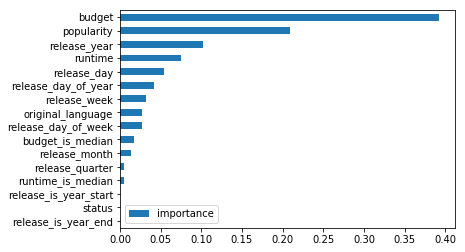

In [42]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=True)
feature_importances.plot(kind = 'barh')
plt.show()

In [45]:
submission.head()

,id,revenue
0,3001,13104039.0
1,3002,810721.0
2,3003,4444384.0
3,3004,5560707.0
4,3005,207637.0
